# This file is a beginning file to learn how to use FlyWire
Specifically I am figuring out how to understand the data that gets pulled. I want to have the same mobility around FlyWire to answer similar questions

In [3]:
import caveclient
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
client = caveclient.CAVEclient()
#client.auth.setup_token(make_new=True)

In [5]:
my_token = "b62b06a56a9f2dbf1c89cfe1def3908c"
client.auth.save_token(my_token, overwrite=True)

In [6]:
datastack_name = "flywire_fafb_public"
client = caveclient.CAVEclient(datastack_name)

Using client.materialize."something" gives you access to the different datastacks available to the public. The options are all below

In [7]:
client.materialize.get_tables()

['hierarchical_neuron_annotations',
 'neuron_information_v2',
 'synapses_nt_v1',
 'nuclei_v1',
 'proofread_neurons',
 'fly_synapses_neuropil_v6']

In [8]:
# Get information about a specific neuron
neuron_id = '720575940625741287'

neuron_info = client.materialize.query_table('proofread_neurons', filter_in_dict={'pt_root_id': [neuron_id]})

# Print the neuron information
neuron_info

,id,created,superceded_id,valid,pt_supervoxel_id,pt_root_id,pt_position
0,31888,2023-06-19 06:44:57.359605+00:00,NaN,t,80011186477400966,720575940625741287,"[546376, 140282, 82218]"


In [ ]:
# Get information about a specific neuron
neuron_id = '720575940625741287'

neuron_info = client.materialize.query_table("hierarchical_neuron_annotations", filter_in_dict={"classification_system": ["cell_type"]})

neuron_info

In [ ]:
# Print the neuron information
neuron_info['cell_type'].value_counts()

# Find the celltypes which names end in letters and not numbers
celltypes = neuron_info['cell_type'].unique()
#celltypes = [celltype for celltype in celltypes if not celltype[-1].isdigit()]

# get all celltypes that end in IN or EN
celltypes_f = [celltype for celltype in celltypes if celltype[-1:] == 'N']
celltypes_f

## Here is how to get pre-syn and post-syn for a root id


Using client.materialize.query_view(datastack_name, filter_in_dict={key for pre or post root: neuron id})

In [9]:
presyn_df = client.materialize.query_view("valid_synapses_nt_np_v6", filter_in_dict={"pre_pt_root_id": [neuron_id]})
postsyn_df = client.materialize.query_view("valid_synapses_nt_np_v6", filter_in_dict={"post_pt_root_id": [neuron_id]})


In [10]:
postsyn_df

,id,pre_pt_root_id,post_pt_root_id,connection_score,cleft_score,gaba,ach,glut,oct,ser,da,valid_nt,pre_pt_supervoxel_id,post_pt_supervoxel_id,neuropil,pre_pt_position,post_pt_position
0,37412,720575940625069701,720575940625741287,378.112244,145,0.001560,0.952661,0.000014,0.000008,5.452095e-04,4.521220e-02,t,79236855413264158,79236855413262971,SMP_L,"[500224, 125272, 74760]","[500240, 125404, 74760]"
1,20560978,720575940638168639,720575940625741287,70.741272,154,0.297695,0.499186,0.049635,0.000118,1.626013e-02,1.371049e-01,t,79940611507133821,79940611507125649,SMP_R,"[543392, 127792, 45000]","[543400, 127940, 45000]"
2,1107766,720575940618216862,720575940625741287,645.536072,53,0.000211,0.969022,0.000002,0.024261,1.685696e-07,6.504103e-03,t,78603330557224667,78603330557232352,SMP_L,"[465596, 111768, 74120]","[465592, 111664, 74120]"
3,162899567,720575940622044394,720575940625741287,383.853638,145,0.001559,0.984942,0.000204,0.011621,4.776173e-05,1.626880e-03,t,79025886686884302,79025886686890382,SMP_L,"[487548, 132804, 97680]","[487620, 132760, 97640]"
4,27372585,720575940606694758,720575940625741287,420.387146,158,0.016603,0.898141,0.020845,0.006305,1.004579e-03,5.710154e-02,t,79870517708075822,79870517708069429,SMP_R,"[537660, 144044, 68800]","[537648, 144136, 68800]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5621,15574871,720575940624799490,720575940625741287,105.699211,144,0.988857,0.000072,0.011063,0.000008,2.769553e-08,4.002641e-07,t,80645467180211224,80645467180210038,CRE_R,"[583440, 195132, 50760]","[583444, 195216, 50720]"
5622,111427301,720575940616150299,720575940625741287,254.607193,108,0.015425,0.948734,0.000142,0.000537,1.064928e-02,2.451242e-02,t,79800080177088000,79800148896590837,SMP_R,"[533404, 141760, 42000]","[533416, 141860, 42000]"
5623,143787941,720575940638336419,720575940625741287,387.531372,144,0.005318,0.935941,0.000235,0.006979,1.881326e-04,5.133953e-02,t,79801248744073258,79801248744078810,IB_R,"[535940, 210552, 154680]","[535860, 210648, 154680]"
5624,93543822,720575940623120222,720575940625741287,293.036926,142,0.443819,0.478935,0.066380,0.000653,1.957797e-03,8.255797e-03,t,80715835924527827,80715835924521563,CRE_R,"[588704, 197196, 54800]","[588596, 197188, 54800]"


Here is how to get the distribution of pre- and post-synaptic partner types for a single neuron

Using the "hierarchical_neuron_annotations" datastack and filtering for super class

Realizing I switched the names above by accident as the tutorial did too, will fix at some point

In [ ]:
super_class_annos_df = client.materialize.query_table("hierarchical_neuron_annotations", filter_equal_dict={"classification_system": "super_class"})
unique_super_class = super_class_annos_df["cell_type"].unique()

Then we copy the super_class_annos_df columns: pt_root_id, and celltype, twice. Once for pre and one for post

In [ ]:
pre_super = super_class_annos_df[["pt_root_id", "cell_type"]].rename(columns={"pt_root_id": "pre_pt_root_id", "cell_type": "pre_cell_type"})
post_super = super_class_annos_df[["pt_root_id", "cell_type"]].rename(columns={"pt_root_id": "post_pt_root_id", "cell_type": "post_cell_type"})


In [ ]:
pre_super

,pre_pt_root_id,pre_cell_type
0,720575940628372613,motor
1,720575940620156283,descending
2,720575940640372277,central
3,720575940634601954,central
4,720575940624155416,central
...,...,...
139250,720575940626100238,optic
139251,720575940626915216,optic
139252,720575940645731620,optic
139253,720575940629075755,optic


Then you would get the pre and post synpases for the neuron (oviINr) but we already did that so the steps are above. We take those dataframes and merge them onto the pre_super and post_super dfs

In [ ]:
pre_syn_super = pd.merge(presyn_df, post_super, on="post_pt_root_id")
post_syn_super = pd.merge(postsyn_df, pre_super, on="pre_pt_root_id")

In [ ]:
postsyn_df

,id,pre_pt_root_id,post_pt_root_id,connection_score,cleft_score,gaba,ach,glut,oct,ser,da,valid_nt,pre_pt_supervoxel_id,post_pt_supervoxel_id,neuropil,pre_pt_position,post_pt_position
0,37412,720575940625069701,720575940625741287,378.112244,145,0.001560,0.952661,0.000014,0.000008,5.452095e-04,4.521220e-02,t,79236855413264158,79236855413262971,SMP_L,"[500224, 125272, 74760]","[500240, 125404, 74760]"
1,1107766,720575940618216862,720575940625741287,645.536072,53,0.000211,0.969022,0.000002,0.024261,1.685696e-07,6.504103e-03,t,78603330557224667,78603330557232352,SMP_L,"[465596, 111768, 74120]","[465592, 111664, 74120]"
2,20560978,720575940638168639,720575940625741287,70.741272,154,0.297695,0.499186,0.049635,0.000118,1.626013e-02,1.371049e-01,t,79940611507133821,79940611507125649,SMP_R,"[543392, 127792, 45000]","[543400, 127940, 45000]"
3,162899567,720575940622044394,720575940625741287,383.853638,145,0.001559,0.984942,0.000204,0.011621,4.776173e-05,1.626880e-03,t,79025886686884302,79025886686890382,SMP_L,"[487548, 132804, 97680]","[487620, 132760, 97640]"
4,27372585,720575940606694758,720575940625741287,420.387146,158,0.016603,0.898141,0.020845,0.006305,1.004579e-03,5.710154e-02,t,79870517708075822,79870517708069429,SMP_R,"[537660, 144044, 68800]","[537648, 144136, 68800]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5621,111427301,720575940616150299,720575940625741287,254.607193,108,0.015425,0.948734,0.000142,0.000537,1.064928e-02,2.451242e-02,t,79800080177088000,79800148896590837,SMP_R,"[533404, 141760, 42000]","[533416, 141860, 42000]"
5622,143787941,720575940638336419,720575940625741287,387.531372,144,0.005318,0.935941,0.000235,0.006979,1.881326e-04,5.133953e-02,t,79801248744073258,79801248744078810,IB_R,"[535940, 210552, 154680]","[535860, 210648, 154680]"
5623,15574871,720575940624799490,720575940625741287,105.699211,144,0.988857,0.000072,0.011063,0.000008,2.769553e-08,4.002641e-07,t,80645467180211224,80645467180210038,CRE_R,"[583440, 195132, 50760]","[583444, 195216, 50720]"
5624,93543822,720575940623120222,720575940625741287,293.036926,142,0.443819,0.478935,0.066380,0.000653,1.957797e-03,8.255797e-03,t,80715835924527827,80715835924521563,CRE_R,"[588704, 197196, 54800]","[588596, 197188, 54800]"


<Axes: xlabel='post_cell_type', ylabel='count'>

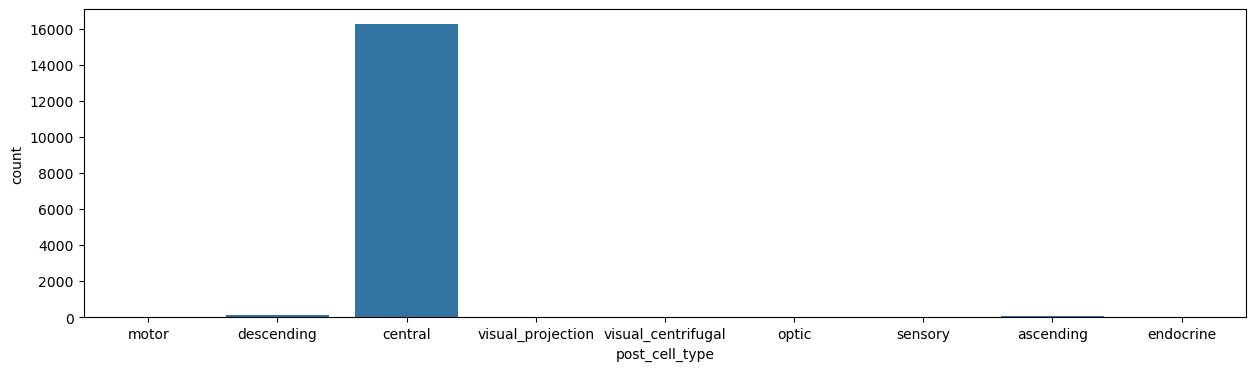

In [ ]:
plt.subplots(figsize=(15, 4))
sns.countplot(pre_syn_super, x="post_cell_type", order=unique_super_class)


<Axes: xlabel='pre_cell_type', ylabel='count'>

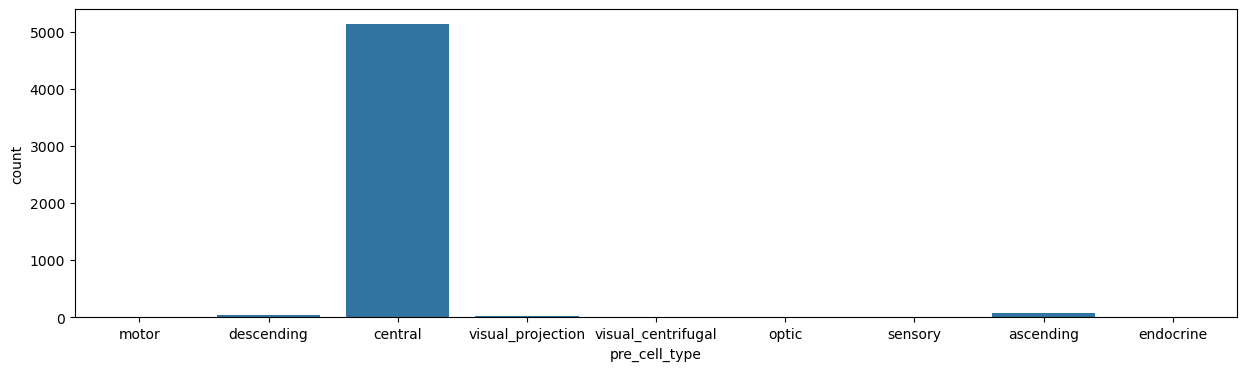

In [ ]:
plt.subplots(figsize=(15, 4))
sns.countplot(post_syn_super, x="pre_cell_type", order=unique_super_class)

Another question to answer using this data, how do they label neuropil and can we use those labels like we did with Neuprint

In [40]:
postsyn_df

,id,pre_pt_root_id,post_pt_root_id,connection_score,cleft_score,gaba,ach,glut,oct,ser,da,valid_nt,pre_pt_supervoxel_id,post_pt_supervoxel_id,neuropil,pre_pt_position,post_pt_position
0,37412,720575940625069701,720575940625741287,378.112244,145,0.001560,0.952661,0.000014,0.000008,5.452095e-04,4.521220e-02,t,79236855413264158,79236855413262971,SMP_L,"[500224, 125272, 74760]","[500240, 125404, 74760]"
1,20560978,720575940638168639,720575940625741287,70.741272,154,0.297695,0.499186,0.049635,0.000118,1.626013e-02,1.371049e-01,t,79940611507133821,79940611507125649,SMP_R,"[543392, 127792, 45000]","[543400, 127940, 45000]"
2,1107766,720575940618216862,720575940625741287,645.536072,53,0.000211,0.969022,0.000002,0.024261,1.685696e-07,6.504103e-03,t,78603330557224667,78603330557232352,SMP_L,"[465596, 111768, 74120]","[465592, 111664, 74120]"
3,162899567,720575940622044394,720575940625741287,383.853638,145,0.001559,0.984942,0.000204,0.011621,4.776173e-05,1.626880e-03,t,79025886686884302,79025886686890382,SMP_L,"[487548, 132804, 97680]","[487620, 132760, 97640]"
4,27372585,720575940606694758,720575940625741287,420.387146,158,0.016603,0.898141,0.020845,0.006305,1.004579e-03,5.710154e-02,t,79870517708075822,79870517708069429,SMP_R,"[537660, 144044, 68800]","[537648, 144136, 68800]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5621,15574871,720575940624799490,720575940625741287,105.699211,144,0.988857,0.000072,0.011063,0.000008,2.769553e-08,4.002641e-07,t,80645467180211224,80645467180210038,CRE_R,"[583440, 195132, 50760]","[583444, 195216, 50720]"
5622,111427301,720575940616150299,720575940625741287,254.607193,108,0.015425,0.948734,0.000142,0.000537,1.064928e-02,2.451242e-02,t,79800080177088000,79800148896590837,SMP_R,"[533404, 141760, 42000]","[533416, 141860, 42000]"
5623,143787941,720575940638336419,720575940625741287,387.531372,144,0.005318,0.935941,0.000235,0.006979,1.881326e-04,5.133953e-02,t,79801248744073258,79801248744078810,IB_R,"[535940, 210552, 154680]","[535860, 210648, 154680]"
5624,93543822,720575940623120222,720575940625741287,293.036926,142,0.443819,0.478935,0.066380,0.000653,1.957797e-03,8.255797e-03,t,80715835924527827,80715835924521563,CRE_R,"[588704, 197196, 54800]","[588596, 197188, 54800]"


In [44]:
# group pair-conncetions if they're in the same neuropil and create a new column with the count of connections using postsyn_df
neuropil_list_inputs = postsyn_df.groupby(["pre_pt_root_id", "post_pt_root_id"]).size().reset_index(name="count")
neuropil_list_inputs

,pre_pt_root_id,post_pt_root_id,count
0,720575940379764436,720575940625741287,1
1,720575940380029656,720575940625741287,1
2,720575940391124292,720575940625741287,1
3,720575940395194154,720575940625741287,1
4,720575940396523214,720575940625741287,1
...,...,...,...
1572,720575940659170433,720575940625741287,4
1573,720575940659331713,720575940625741287,1
1574,720575940659437185,720575940625741287,1
1575,720575940660052865,720575940625741287,1


In [43]:
neuropil_list_outputs = presyn_df.groupby(["pre_pt_root_id", "post_pt_root_id"]).size().reset_index(name="count")
neuropil_list_outputs

,pre_pt_root_id,post_pt_root_id,count
0,720575940625741287,720575940379822808,1
1,720575940625741287,720575940379950603,1
2,720575940625741287,720575940379951371,1
3,720575940625741287,720575940379983832,1
4,720575940625741287,720575940379996376,1
...,...,...,...
24604,720575940625741287,720575940659331713,10
24605,720575940625741287,720575940659392129,4
24606,720575940625741287,720575940659437185,3
24607,720575940625741287,720575940660799361,4


([<matplotlib.patches.Wedge at 0x3dfeccc50>,
 [Text(1.0999985487260837, 0.0017868409301695545, 'AL_R'),
  Text(1.0997547437514914, 0.02322721670997007, 'ATL_R'),
  Text(1.097191528856776, 0.07855411513683265, 'CAN_R'),
  Text(1.0920623868242731, 0.1319080864984083, 'CRE_L'),
  Text(0.9062181991060623, 0.6235130917703056, 'CRE_R'),
  Text(0.5276728202572983, 0.9651742820660468, 'FB'),
  Text(0.42795770967215085, 1.0133371594549205, 'FLA_R'),
  Text(0.287863942999367, 1.0616658374087666, 'IB_L'),
  Text(0.09280531963982151, 1.09607808692928, 'IB_R'),
  Text(-0.16201107758245598, 1.0880038652231763, 'LAL_R'),
  Text(-0.29303421391290957, 1.06025041828638, 'MB_ML_R'),
  Text(-0.3494210684555039, 1.0430268054654273, 'MB_VL_L'),
  Text(-0.3747292482558784, 1.0342040371713817, 'MB_VL_R'),
  Text(-0.4312475694385175, 1.0119414676024356, 'SAD'),
  Text(-0.9801882756456791, 0.4992303519285965, 'SMP_L'),
  Text(-0.15316908626840076, -1.0892838156383777, 'SMP_R'),
  Text(1.019485217459183, -0.4130

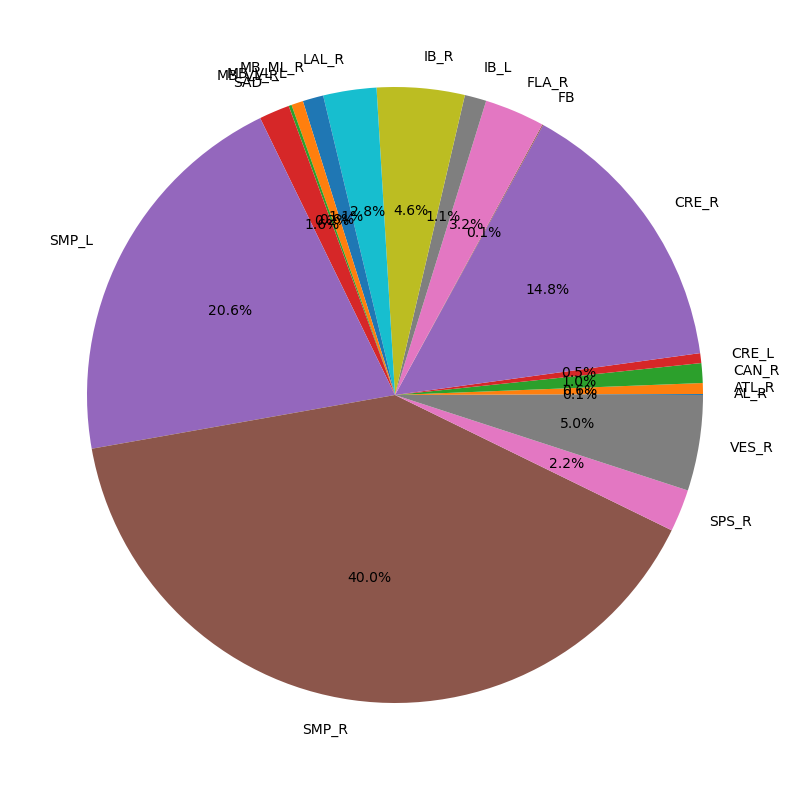

In [ ]:
# Piechart of the neuropil groups, only tells us general breakdown of where the connections to the oviIN are made
neuropil_plot = neuropil_list_inputs.groupby("neuropil").size().reset_index(name="count")
plt.subplots(figsize=(10, 10))
plt.pie(neuropil_plot["count"], labels=neuropil_plot["neuropil"], autopct='%1.1f%%')

Seem to use Primary leve roi like neuprint, we know that the oviIN exists within these neuropils

## Now I want to try creating the input subconnectome edgelist...
One difficulty I see us hitting is that a query can only result in 500,000 rows of data but I beleive the input connectome has more....
I can confirm that it is not possible to pull an edgelist from online. query_view only allows a 500,000 row query and the tables available through CAVE are only NT and per-synapse data which is useful but not for creating an edgelist for the oviIN input connectome (too many connections) \
\
This is the code I used to try and query the inputs' inputs and outputs:
```python
# Getting the neuron root ids of all neurons that are pre-synaptic to oviINr
pre_ids = postsyn_df[['pre_pt_root_id']]
pre_ids = pre_ids['pre_pt_root_id'].unique().tolist()

# Query all connections to that neuron ids list
postsyn_df = client.materialize.query_view("valid_synapses_nt_np_v6", filter_in_dict={"post_pt_root_id": pre_ids})
```

Next I am going to go to the codex website and download the raw connections table. This table is non-thresholded and contains alot of pair repeats as the row for a pair is the aggregated connections of the pair in a neuropil.


In [ ]:
pre_ids = postsyn_df[['pre_pt_root_id']]
pre_ids = pre_ids['pre_pt_root_id'].unique().tolist()

https://codex.flywire.ai/api/download

In [46]:
all_connections = pd.read_csv('connections_no_threshold.csv')
all_connections

,pre_root_id,post_root_id,neuropil,syn_count,nt_type
0,720575940629970489,720575940631267655,AVLP_R,7,GABA
1,720575940623828999,720575940612348950,SLP_R,4,GLUT
2,720575940624078484,720575940616950161,SMP_R,2,ACH
3,720575940629583345,720575940620324735,SMP_L,2,GLUT
4,720575940605876866,720575940606514878,LAL_R,15,GABA
...,...,...,...,...,...
16847992,720575940615769750,720575940622822680,AVLP_L,1,ACH
16847993,720575940624016823,720575940622760993,ME_R,4,ACH
16847994,720575940637397309,720575940633255123,SLP_R,2,GABA
16847995,720575940636432014,720575940617470681,ME_R,1,GLUT


### Creating a pre_ids list

Here is where I am tweaking a little bit, depending on where I query from (CAVE valid_synapses_nt_np_v6, or from the all_connections dataframe) the list of pre neuron ids change. I showed this down below. I don't know which one to believe.

The all_connections is the dataframe "Connections" that I downloaded from Codex.

Postsyn_df is the pulled data from CAVE client which has established filters that show a dataframe with validated synapses.

The weird part is that the pulled CAVE data (second code box example) which is validated data produces more pre-synaptic ids while the unfiltered/unvalidated(?) Connections dataframe produces less neuron ids pre-synaptic to the oviINr.

In [47]:
# Create a new pre_ids list 

# Find oviIN in post_root_id column
oviIN = all_connections[all_connections['post_root_id'] == 720575940625741287]

# Find all the pre_ids that connect to oviIN
oviIN_pre_ids = oviIN['pre_root_id'].unique().tolist()
len(oviIN_pre_ids)

1282

In [54]:
# Checking unique pairs
filtered_post = postsyn_df[['pre_pt_root_id', 'post_pt_root_id']].drop_duplicates()
filtered_pre  = presyn_df[['pre_pt_root_id', 'post_pt_root_id']].drop_duplicates()
# get pre_pt_root_id 
post_ids_filtered = filtered_pre['post_pt_root_id'].unique()
pre_ids_filtered = filtered_post['pre_pt_root_id'].unique()

# Combine the two lists and drop duplicates
all_ids = np.concatenate((post_ids_filtered, pre_ids_filtered))
all_ids = np.unique(all_ids)
len(all_ids)

25357

In [66]:
filtered_pre

,pre_pt_root_id,post_pt_root_id
0,720575940625741287,720575940591578492
1,720575940625741287,720575940489775777
2,720575940625741287,720575940639369587
3,720575940625741287,720575940624882190
4,720575940625741287,720575940406397711
...,...,...
44366,720575940625741287,720575940611261170
44374,720575940625741287,720575940627486485
44381,720575940625741287,720575940613594783
44408,720575940625741287,720575940632469964


In [49]:
# are there any ids in pre_ids_filtered that are not in all_connections pre_root_id, yes is the answer
missing_ids = [x for x in pre_ids_filtered if x not in all_connections['pre_root_id'].unique()]
#missing_ids


We want to filter this so that the pre_ids are the only neurons in the connections table. We also want to make sure the oviIN isn't here.

I am going to do this by first filtering the pre and then the post? These connections should be (pre_ids, pre_ids). 

Maybe I am doing this wrong... shouldn't there be more connections?

In [ ]:
# I want to filter all_connections so that the pre_root_id and post_root_id are only neurons that are in the pre_ids list
filtered_connections = all_connections[all_connections['post_root_id'].isin(pre_ids_filtered) & all_connections['pre_root_id'].isin(pre_ids_filtered)]

filtered_connections

,pre_root_id,post_root_id,neuropil,syn_count,nt_type
84,720575940610491694,720575940637902938,SMP_L,48,ACH
107,720575940630644727,720575940625990500,SMP_R,7,GABA
248,720575940631103744,720575940631761433,SMP_L,1,ACH
296,720575940616483414,720575940623067686,SMP_R,3,ACH
330,720575940625559908,720575940629139834,AL_R,5,ACH
...,...,...,...,...,...
16846852,720575940617496861,720575940633893401,PVLP_R,1,GLUT
16847153,720575940618857083,720575940623164515,SMP_R,1,GLUT
16847222,720575940637293687,720575940631668793,SIP_L,1,DA
16847438,720575940626867530,720575940605158065,SMP_R,1,ACH


Checking that the neuropils aren't hierarchical and therefore double count

In [ ]:
filtered_connections['neuropil'].unique()

array(['SMP_L', 'SMP_R', 'AL_R', 'CRE_L', 'LAL_L', 'CRE_R', 'SIP_R',
       'LAL_R', 'MB_VL_L', 'AOTU_L', 'AVLP_R', 'SLP_R', 'SIP_L', 'PRW',
       'MB_ML_R', 'GNG', 'AOTU_R', 'IB_R', 'SCL_R', 'VES_R', 'ICL_R',
       'SPS_R', 'CAN_L', 'FLA_R', 'AL_L', 'SCL_L', 'FLA_L', 'GOR_R',
       'ATL_R', 'NO', 'IB_L', 'GOR_L', 'PVLP_R', 'VES_L', 'PLP_R',
       'SLP_L', 'CAN_R', 'ICL_L', 'LH_R', 'EPA_R', 'MB_PED_R', 'WED_R',
       'ATL_L', 'MB_VL_R', 'FB', 'SAD', 'SPS_L', 'LH_L', 'MB_ML_L',
       'PLP_L', 'IPS_R', 'WED_L', 'PVLP_L', 'IPS_L', 'AVLP_L', 'BU_L',
       'PB', 'BU_R', 'MB_PED_L', 'UNASGD', 'EPA_L', 'AMMC_R', 'MB_CA_R',
       'LO_R', 'GA_R', 'MB_CA_L', 'GA_L', 'EB'], dtype=object)

Dropping the Neuropil and nt_type column to group by pair and sum the syn_counts so it's not separated by neuropil

In [ ]:
filtered_grouped = filtered_connections[['pre_root_id', 'post_root_id', 'syn_count']].groupby(['pre_root_id', 'post_root_id']).sum(['syn_count']).reset_index()

In [ ]:
filtered_grouped

,pre_root_id,post_root_id,syn_count
0,720575940602703072,720575940611872149,1
1,720575940602703072,720575940615263931,4
2,720575940602703072,720575940617024562,36
3,720575940602703072,720575940617296029,10
4,720575940602703072,720575940617551409,1
...,...,...,...
63034,720575940661302657,720575940641546715,44
63035,720575940661302657,720575940641681104,10
63036,720575940661302657,720575940643191575,2
63037,720575940661302657,720575940646160948,1


Checking that this did what I wanted it to AHHHHH

In [ ]:
# Find all rows that have 720575940661302657 720575940641546715	as a pair in filtered_connections
filtered_connections[(filtered_connections['pre_root_id'] == 720575940661302657) & (filtered_connections['post_root_id'] == 720575940641546715)]

,pre_root_id,post_root_id,neuropil,syn_count,nt_type
6514794,720575940661302657,720575940641546715,SMP_L,15,ACH
11668353,720575940661302657,720575940641546715,SMP_R,29,ACH


In [ ]:
# Checking the other way?? Not sure if this is a necessary collapse since we have other things that make it undirected but just want to make sure
# I can't find anything from this????
filtered_connections[(filtered_connections['pre_root_id'] == 720575940617024562) & (filtered_connections['post_root_id'] == 720575940602703072)]

,pre_root_id,post_root_id,neuropil,syn_count,nt_type


## Takeaways
I found that in this dataset the oviIN input connectome is 1282 unique root ids which is quite a bit less than neuprint

In [ ]:
from neuprint import Client, fetch_neurons

from neuprint import fetch_simple_connections, fetch_synapse_connections, NeuronCriteria as NC

auth_token_file = open("/Users/rweberla/flybrain-clustering-rhessa/flybrain.auth.txt", 'r') # need file containing the authentication token
auth_token = next(auth_token_file).strip()
try:
    np_client = Client('neuprint.janelia.org', dataset='hemibrain:' + 'v1.2.1', token=auth_token)
    print('Connected to NeuPrint')
except:
    np_client = None


Connected to NeuPrint


In [ ]:
inputs = fetch_simple_connections(None, NC(bodyId = 423101189))
inputs = inputs[['bodyId_pre', 'bodyId_post', 'weight']]
inputs

,bodyId_pre,bodyId_post,weight
0,611015907,423101189,287
1,5813087891,423101189,255
2,1598011458,423101189,243
3,5813022375,423101189,236
4,448342846,423101189,225
...,...,...,...
2519,5901221890,423101189,1
2520,5901226036,423101189,1
2521,5901230025,423101189,1
2522,5901231318,423101189,1


In [16]:
# Trying to access this table but it's not working
client.materialize.get_tables()

['hierarchical_neuron_annotations',
 'neuron_information_v2',
 'synapses_nt_v1',
 'nuclei_v1',
 'proofread_neurons',
 'fly_synapses_neuropil_v6']

In [38]:
post_conns

,id,created,valid,target_id,neuropil,id_ref,created_ref,valid_ref,connection_score,cleft_score,...,oct,ser,da,valid_nt,pre_pt_supervoxel_id,pre_pt_root_id,post_pt_supervoxel_id,post_pt_root_id,pre_pt_position,post_pt_position
0,1,2024-02-14 00:39:26.078645+00:00,t,0,AVLP_L,0,2021-03-09 20:14:58.183080+00:00,t,7.635252,0,...,0.019089,0.112843,0.490285,t,76916748439627068,720575940630479697,76916748439628340,720575940605404546,"[366196, 244760, 73920]","[366296, 244740, 73960]"
1,2,2024-02-14 00:39:26.078645+00:00,t,1,AVLP_L,1,2021-03-09 20:14:58.183080+00:00,t,15.259161,0,...,0.044355,0.268214,0.136565,t,76916748439635341,720575940630479697,76916748439614229,720575940616174657,"[364864, 245640, 73960]","[364708, 245588, 73960]"
2,3,2024-02-14 00:39:26.078645+00:00,t,2,AVLP_L,2,2021-03-09 20:14:58.183080+00:00,t,10.514650,0,...,0.052839,0.028816,0.030364,t,76916748439614229,720575940616174657,76916748439623112,720575940545890960,"[364564, 244904, 73960]","[364680, 244840, 74000]"
3,4,2024-02-14 00:39:26.078645+00:00,t,3,AVLP_L,3,2021-03-09 20:14:58.183080+00:00,t,71.585907,0,...,0.000980,0.027569,0.028674,t,76916748439632311,720575940630479697,76916748439633329,720575940633787309,"[364600, 244468, 74200]","[364552, 244344, 74200]"
4,5,2024-02-14 00:39:26.078645+00:00,t,4,AVLP_L,4,2021-03-09 20:14:58.183080+00:00,t,21.044254,0,...,0.000612,0.023012,0.026030,t,76916748439652476,720575940630906435,76916748439632348,720575940630479697,"[364952, 244764, 74240]","[364860, 244796, 74200]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,499996,2024-02-14 00:39:26.078645+00:00,t,499995,AL_L,499995,2021-03-09 20:14:58.183080+00:00,t,111.557610,61,...,0.002084,0.047305,0.744575,t,78606010616850497,720575940623280311,78606010616848064,720575940613869777,"[465368, 270168, 74120]","[465304, 270084, 74120]"
499996,499997,2024-02-14 00:39:26.078645+00:00,t,499996,AL_L,499996,2021-03-09 20:14:58.183080+00:00,t,349.442017,141,...,0.000838,0.022604,0.143104,t,78606010616860538,720575940604414636,78606010616853037,720575940510890976,"[464796, 270244, 74160]","[464920, 270252, 74120]"
499997,499998,2024-02-14 00:39:26.078645+00:00,t,499997,AL_L,499997,2021-03-09 20:14:58.183080+00:00,t,339.632263,140,...,0.000419,0.001852,0.116189,t,78606010616850660,720575940604414636,78606010616849373,720575940645199924,"[464932, 271028, 74080]","[464888, 270908, 74120]"
499998,499999,2024-02-14 00:39:26.078645+00:00,t,499998,AL_L,499998,2021-03-09 20:14:58.183080+00:00,t,76.239288,3,...,0.000966,0.011176,0.081368,t,78606010616854574,720575940515388743,78606010616849458,720575940515388743,"[464480, 271264, 74080]","[464568, 271304, 74080]"


In [57]:
# This seems to be the same thing as fetch_simple_connections(pre_ids_filtered, pre_ids_filtered)
ins_connections = client.materialize.query_view("valid_synapses_nt_np_v6", filter_in_dict={"pre_pt_root_id": pre_ids_filtered, "post_pt_root_id": pre_ids_filtered})

In [58]:
ins_connections

,id,pre_pt_root_id,post_pt_root_id,connection_score,cleft_score,gaba,ach,glut,oct,ser,da,valid_nt,pre_pt_supervoxel_id,post_pt_supervoxel_id,neuropil,pre_pt_position,post_pt_position
0,136159134,720575940624280328,720575940612572131,347.002930,159,0.016576,5.433413e-01,0.021071,2.269141e-03,0.021037,0.395705,t,80151923965557334,80151923965557338,SMP_R,"[556712, 139192, 77280]","[556588, 139080, 77280]"
1,119590158,720575940630571148,720575940629067163,415.861877,93,0.000001,6.504876e-08,0.000001,6.589454e-02,0.934065,0.000038,t,78814780454474310,78814780454479172,SMP_L,"[477728, 133184, 102160]","[477712, 133328, 102200]"
2,126526,720575940622219190,720575940641780187,68.799873,140,0.993867,1.491388e-03,0.004407,1.587791e-07,0.000005,0.000230,t,80152954757640431,80152954757635737,CRE_R,"[553812, 200556, 74400]","[553752, 200456, 74360]"
3,217529555,720575940612490958,720575940641518733,8.598676,126,0.036265,8.023096e-01,0.061814,2.364592e-03,0.060556,0.036691,t,77759111919911367,77759111919913629,SLP_L,"[414380, 123456, 120920]","[414428, 123520, 121000]"
4,181771789,720575940629095323,720575940629067163,529.229919,152,0.000352,9.942070e-01,0.000002,1.285098e-04,0.000008,0.005303,t,78181599262623272,78181599262631813,SIP_L,"[441812, 139384, 112680]","[441704, 139400, 112720]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280601,236348146,720575940629242428,720575940613944994,47.242290,146,0.597737,1.279256e-01,0.266876,1.489346e-03,0.000464,0.005508,t,80081486636226528,80081486636211974,SMP_R,"[551284, 134052, 120240]","[551164, 134028, 120240]"
280602,79675913,720575940631069184,720575940620534744,45.552010,130,0.012217,6.181909e-01,0.003122,5.914955e-04,0.078658,0.287220,t,79095980486076300,79095980486069680,SMP_L,"[493552, 114684, 78200]","[493580, 114624, 78280]"
280603,111709400,720575940628360506,720575940620534744,378.358215,148,0.770482,1.219986e-02,0.214613,2.713400e-05,0.002593,0.000085,t,79166624040783534,79166624040782278,SMP_L,"[498372, 132600, 49560]","[498424, 132688, 49560]"
280604,54796475,720575940626951434,720575940620534744,109.301910,142,0.011653,6.196002e-01,0.069111,6.402471e-04,0.013326,0.285670,t,79025611741704378,79025611741717176,SMP_L,"[488508, 115088, 72720]","[488592, 115176, 72720]"


In [59]:
# Group connections and count them
ins_grouped = ins_connections.groupby(['pre_pt_root_id', 'post_pt_root_id']).size().reset_index(name="count")
ins_grouped

,pre_pt_root_id,post_pt_root_id,count
0,720575940401220468,720575940628717585,1
1,720575940425725221,720575940636997744,1
2,720575940441835210,720575940610696654,1
3,720575940443196144,720575940606366850,1
4,720575940443196144,720575940620889936,1
...,...,...,...
63732,720575940661302657,720575940641546715,44
63733,720575940661302657,720575940641681104,10
63734,720575940661302657,720575940643191575,2
63735,720575940661302657,720575940646160948,1


In [64]:
# See if oviIN is int the dataframe
print(neuron_id in ins_grouped['pre_pt_root_id'].unique())
print(neuron_id in ins_grouped['post_pt_root_id'].unique())


False
False


# Making the edgelist for modularity run

In [24]:
all_connections = pd.read_csv('/Users/rweberla/Downloads/connections_princeton_no_threshold.csv')



In [25]:
# Create a new pre_ids list 

# Find oviIN in post_root_id column
oviIN = all_connections[all_connections['post_pt_root_id'] == 720575940625741287]

# Find all the pre_ids that connect to oviIN
oviIN_pre_ids = oviIN['pre_pt_root_id'].unique().tolist()
len(oviIN_pre_ids)


1548

In [26]:
# Find all connections made between oviIN_pre_ids, so the ids can be in both the pre_pt_root_id and post_pt_root_id columns

oviIN_connections = all_connections[all_connections['pre_pt_root_id'].isin(oviIN_pre_ids) & all_connections['post_pt_root_id'].isin(oviIN_pre_ids)]
oviIN_connections = oviIN_connections[['pre_pt_root_id', 'post_pt_root_id', 'syn_count']].reset_index(drop=True)
oviIN_connections

,pre_pt_root_id,post_pt_root_id,syn_count
0,720575940635984239,720575940612490958,6
1,720575940624394790,720575940608042332,7
2,720575940623164515,720575940635802991,2
3,720575940616561803,720575940636489140,2
4,720575940619637056,720575940621638534,3
...,...,...,...
166961,720575940631847763,720575940612063602,4
166962,720575940604821950,720575940646407476,3
166963,720575940615314129,720575940606573490,1
166964,720575940640891736,720575940608810453,1


In [27]:
# Check if the oviIN is in the dataframe
print(720575940625741287 in oviIN_connections['pre_pt_root_id'].unique()) 
print(720575940625741287 in oviIN_connections['post_pt_root_id'].unique())

False
False


In [28]:
# Save to txt file
oviIN_connections.to_csv('/Users/rweberla/Downloads/oviIN_connections.txt', sep=',', index=False, header=False)

In [33]:
# Import clustering result
clustering0 = pd.read_csv('clustering_result.txt', sep=' ', header=None)
clustering005 = pd.read_csv('clustering_result005.txt', sep=' ', header=None)
#clustering01 = pd.read_csv('clustering_result01.txt', sep=' ', header=None)
clustering0.rename(columns={0: 'id', 1: '0.0'}, inplace=True)
clustering005.rename(columns={0: 'id', 1: '0.05'}, inplace=True)
clustering0

,id,0.0
0,720575940602703072,1
1,720575940603201452,2
2,720575940603693158,3
3,720575940603715296,4
4,720575940603751857,3
...,...,...
1542,720575940654676385,1
1543,720575940655011489,5
1544,720575940658554753,4
1545,720575940659170433,3


In [34]:
# Merge the two clustering results
clustering = pd.merge(clustering0, clustering005, on='id')
clustering

,id,0.0,0.05
0,720575940602703072,1,1
1,720575940603201452,2,2
2,720575940603693158,3,3
3,720575940603715296,4,4
4,720575940603751857,3,3
...,...,...,...
1542,720575940654676385,1,5
1543,720575940655011489,5,6
1544,720575940658554753,4,4
1545,720575940659170433,3,3


In [37]:
# Save to txt file
clustering.to_csv('clustering_result_combined.txt', sep=' ', index=False, header=False)


In [40]:
clustering005['0.05'].value_counts()

0.05
4    472
2    332
6    250
3    234
5    129
1    128
7      2
Name: count, dtype: int64

In [41]:
clustering005[clustering005['0.05'] == 7]

,id,0.05
772,720575940625264457,7
1293,720575940634605920,7


In [18]:
# Check that cluster 7 neurons actually connect to the oviIN
cluster7 = clustering0[clustering0['0.0'] == 7]
cluster7 = cluster7['id'].tolist()

# Find all connections made between cluster7 and oviIN
cluster7_connections = all_connections[all_connections['pre_pt_root_id'].isin(cluster7) & all_connections['post_pt_root_id'].isin([720575940625741287])]
cluster7_connections = cluster7_connections[['pre_pt_root_id', 'post_pt_root_id', 'syn_count']].reset_index(drop=True)
cluster7_connections

,pre_pt_root_id,post_pt_root_id,syn_count
0,720575940614321831,720575940625741287,1
1,720575940634605920,720575940625741287,2
2,720575940625264457,720575940625741287,1
3,720575940640356149,720575940625741287,2
